<a href="https://colab.research.google.com/github/gogowonji/Big-Data-Analysis/blob/main/20230509_project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import glob
import re
from functools import reduce # reduce 함수 쓰려고
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [4]:
!pip install nltk
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
all_files = glob.glob('myCabinetExcelData*.xls')
all_files

['myCabinetExcelData (7).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData.xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (1).xls']

In [7]:
all_files_data = []
for file in all_files:
  data_frame = pd.read_excel(file)
  all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,The Use of Crowdfunding and Social Media Platf...,"Park, Sun-Young; Loo, Boon Thau",Taylor & Francis,2022
1,NaN,2,A Review of Modern Cryptography: From the Worl...,"Lu, Bojun",Kluwer Academic Publishers,2017
2,NaN,3,A utility-maximization model for retrieving us...,"Gkiotsalitis, K.; Stathopoulos, A.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,A benchmark approach and its toolkit for onlin...,"Zhang, Dongzhan; Yan, Wenjing; Bugingo, Emmanu...","Elsevier Science B.V., Amsterdam.",2018
4,NaN,5,"Determinant roles of gender and age on sii, pl...","Meng, Xianchun; Chang, Qian; Liu, Yuying; Chen...","John Wiley & Sons, Ltd",2018
...,...,...,...,...,...,...
95,NaN,96,Big Data: Tutorial and guidelines on informati...,"Ramírez-Gallego, Sergio; Fernández, Alberto; G...","Elsevier Science B.V., Amsterdam.",2018
96,NaN,97,Data Intelligence in the Context of Big Data: ...,"Hicham M. Safhi, Bouchra Frikh, Badr Hirchoua,...",Rinton Press,2017
97,NaN,98,Big Data: Implications for Health System Pharmacy,"Stokes, Laura B.; Rogers, Joseph W.; Hertig,...",J B LIPPINCOTT CO,2016
98,NaN,99,Big Data: Herausforderungen und Potenziale für...,"Fischer, S.",Springer Science + Business Media,2014


In [8]:
all_files_data_concat = pd.concat(all_files_data,axis=0,ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,The Use of Crowdfunding and Social Media Platf...,"Park, Sun-Young; Loo, Boon Thau",Taylor & Francis,2022
1,NaN,2,A Review of Modern Cryptography: From the Worl...,"Lu, Bojun",Kluwer Academic Publishers,2017
2,NaN,3,A utility-maximization model for retrieving us...,"Gkiotsalitis, K.; Stathopoulos, A.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,A benchmark approach and its toolkit for onlin...,"Zhang, Dongzhan; Yan, Wenjing; Bugingo, Emmanu...","Elsevier Science B.V., Amsterdam.",2018
4,NaN,5,"Determinant roles of gender and age on sii, pl...","Meng, Xianchun; Chang, Qian; Liu, Yuying; Chen...","John Wiley & Sons, Ltd",2018
...,...,...,...,...,...,...
995,NaN,96,A Multi-Branch Decoder Network Approach to Ada...,"Zhang, Yang",unknown,2022
996,NaN,97,Memory Scaling of Cloud-Based Big Data Systems...,"Wang, Xinying",unknown,2022
997,NaN,98,Towards quality-of-service driven consistency ...,"García-Recuero, Álvaro; Esteves, Sérgio; Veiga...",Inderscience,2014
998,NaN,99,Fast approaches for semantic service compositi...,"Huang, Jun; Zhou, Yide; Duan, Qiang; Xing, Con...",Inderscience,2019


In [9]:
all_files_data_concat.to_csv('riss_bigdata.csv',encoding='utf-8-sig',index=False)

In [10]:
all_files = glob.glob('myCabinetExcelData*.xls')
all_files

['myCabinetExcelData (7).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData.xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (1).xls']

In [11]:
all_files_data = []
for file in all_files:
  data_frame = pd.read_excel(file)
  all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,The Use of Crowdfunding and Social Media Platf...,"Park, Sun-Young; Loo, Boon Thau",Taylor & Francis,2022
1,NaN,2,A Review of Modern Cryptography: From the Worl...,"Lu, Bojun",Kluwer Academic Publishers,2017
2,NaN,3,A utility-maximization model for retrieving us...,"Gkiotsalitis, K.; Stathopoulos, A.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,A benchmark approach and its toolkit for onlin...,"Zhang, Dongzhan; Yan, Wenjing; Bugingo, Emmanu...","Elsevier Science B.V., Amsterdam.",2018
4,NaN,5,"Determinant roles of gender and age on sii, pl...","Meng, Xianchun; Chang, Qian; Liu, Yuying; Chen...","John Wiley & Sons, Ltd",2018
...,...,...,...,...,...,...
95,NaN,96,Big Data: Tutorial and guidelines on informati...,"Ramírez-Gallego, Sergio; Fernández, Alberto; G...","Elsevier Science B.V., Amsterdam.",2018
96,NaN,97,Data Intelligence in the Context of Big Data: ...,"Hicham M. Safhi, Bouchra Frikh, Badr Hirchoua,...",Rinton Press,2017
97,NaN,98,Big Data: Implications for Health System Pharmacy,"Stokes, Laura B.; Rogers, Joseph W.; Hertig,...",J B LIPPINCOTT CO,2016
98,NaN,99,Big Data: Herausforderungen und Potenziale für...,"Fischer, S.",Springer Science + Business Media,2014


In [23]:
all_title=all_files_data_concat['제목']
print(all_title)

0      The Use of Crowdfunding and Social Media Platf...
1      A Review of Modern Cryptography: From the Worl...
2      A utility-maximization model for retrieving us...
3      A benchmark approach and its toolkit for onlin...
4      Determinant roles of gender and age on sii, pl...
                             ...                        
995    A Multi-Branch Decoder Network Approach to Ada...
996    Memory Scaling of Cloud-Based Big Data Systems...
997    Towards quality-of-service driven consistency ...
998    Fast approaches for semantic service compositi...
999    A five-layer architecture for big data process...
Name: 제목, Length: 1000, dtype: object


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
stopWords=set(stopwords.words("english"))
lemma=WordNetLemmatizer()

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
words=[]
for title in all_title:
  EnWords=re.sub(r"[^a-zA-Z]+"," ",str(title)) #알파벳 이외의 값은 공백으로 대체
  EnWordsToken=word_tokenize(EnWords.lower()) #위의 결과 str을 소문자로 바꾼 뒤, 토큰화
  EnWordsTokenStop=[w for w in EnWordsToken if w not in stopWords] #불용어 제거
  EnWordsTokenStopLemma=[lemma.lemmatize(w) for w in EnWordsTokenStop] #표제어 추출
  words.append(EnWordsTokenStopLemma)
print(type(words))
print(words) # 2차원
print(len(words))

<class 'list'>
[['use', 'crowdfunding', 'social', 'medium', 'platform', 'strategic', 'start', 'communication', 'big', 'data', 'analysis'], ['review', 'modern', 'cryptography', 'world', 'war', 'ii', 'era', 'big', 'data', 'era'], ['utility', 'maximization', 'model', 'retrieving', 'user', 'willingness', 'travel', 'participating', 'activity', 'big', 'data'], ['benchmark', 'approach', 'toolkit', 'online', 'scheduling', 'multiple', 'deadline', 'constrained', 'workflow', 'big', 'data', 'processing', 'system'], ['determinant', 'role', 'gender', 'age', 'sii', 'plr', 'nlr', 'lmr', 'mlr', 'reference', 'interval', 'defining', 'henan', 'china', 'posteriori', 'big', 'data', 'based'], ['big', 'data', 'algorithm', 'knn', 'pls'], ['donepezil', 'use', 'emergence', 'comorbidity', 'patient', 'alzheimer', 'dementia', 'finding', 'real', 'world', 'big', 'data', 'japan'], ['big', 'data', 'small', 'data', 'concept', 'big', 'data', 'hard', 'quantify', 'good', 'remember', 'hat', 'big', 'data', 'made', 'small', '

In [29]:
# 2차원 리스트를 1차원 리스트로
words2 = list(reduce(lambda x,y:x+y,words))
# reduce 함수 - 연산 계속 누적
# Lambda 함수 - 일시적인 함수
print(words2) # 1차원
print(len(words2))

['use', 'crowdfunding', 'social', 'medium', 'platform', 'strategic', 'start', 'communication', 'big', 'data', 'analysis', 'review', 'modern', 'cryptography', 'world', 'war', 'ii', 'era', 'big', 'data', 'era', 'utility', 'maximization', 'model', 'retrieving', 'user', 'willingness', 'travel', 'participating', 'activity', 'big', 'data', 'benchmark', 'approach', 'toolkit', 'online', 'scheduling', 'multiple', 'deadline', 'constrained', 'workflow', 'big', 'data', 'processing', 'system', 'determinant', 'role', 'gender', 'age', 'sii', 'plr', 'nlr', 'lmr', 'mlr', 'reference', 'interval', 'defining', 'henan', 'china', 'posteriori', 'big', 'data', 'based', 'big', 'data', 'algorithm', 'knn', 'pls', 'donepezil', 'use', 'emergence', 'comorbidity', 'patient', 'alzheimer', 'dementia', 'finding', 'real', 'world', 'big', 'data', 'japan', 'big', 'data', 'small', 'data', 'concept', 'big', 'data', 'hard', 'quantify', 'good', 'remember', 'hat', 'big', 'data', 'made', 'small', 'data', 'big', 'data', 'savvy',

In [27]:
# 단어 빈도 구하기
count = Counter(words2) # 딕셔너리 형태로 저장됨
print(count)

Counter({'data': 1324, 'big': 1185, 'analytics': 128, 'based': 96, 'analysis': 87, 'approach': 62, 'system': 62, 'using': 60, 'learning': 48, 'driven': 46, 'challenge': 46, 'platform': 43, 'framework': 41, 'cloud': 40, 'health': 39, 'model': 37, 'algorithm': 37, 'new': 37, 'science': 36, 'management': 35, 'processing': 33, 'application': 31, 'use': 30, 'era': 30, 'distributed': 29, 'world': 28, 'efficient': 28, 'review': 27, 'process': 27, 'service': 27, 'research': 26, 'perspective': 26, 'machine': 26, 'business': 25, 'mining': 25, 'time': 25, 'smart': 25, 'opportunity': 25, 'energy': 25, 'technology': 24, 'industry': 24, 'computing': 24, 'scalable': 24, 'earth': 23, 'real': 22, 'small': 22, 'optimization': 22, 'online': 21, 'performance': 21, 'survey': 21, 'issue': 21, 'future': 20, 'information': 20, 'security': 20, 'editorial': 20, 'intelligence': 20, 'development': 19, 'scale': 18, 'little': 18, 'healthcare': 18, 'database': 18, 'infrastructure': 17, 'intelligent': 17, 'sustainabl

In [40]:
word_count=dict()
for tag, counts in count.most_common(50): # 빈도수가 많은 50개 추출
  if(len(str(tag))>1):
    word_count[tag]=counts
    print("{}: {}".format(tag,counts))

data: 1324
big: 1185
analytics: 128
based: 96
analysis: 87
approach: 62
system: 62
using: 60
learning: 48
driven: 46
challenge: 46
platform: 43
framework: 41
cloud: 40
health: 39
model: 37
algorithm: 37
new: 37
science: 36
management: 35
processing: 33
application: 31
use: 30
era: 30
distributed: 29
world: 28
efficient: 28
review: 27
process: 27
service: 27
research: 26
perspective: 26
machine: 26
business: 25
mining: 25
time: 25
smart: 25
opportunity: 25
energy: 25
technology: 24
industry: 24
computing: 24
scalable: 24
earth: 23
real: 22
small: 22
optimization: 22
online: 21
performance: 21
survey: 21


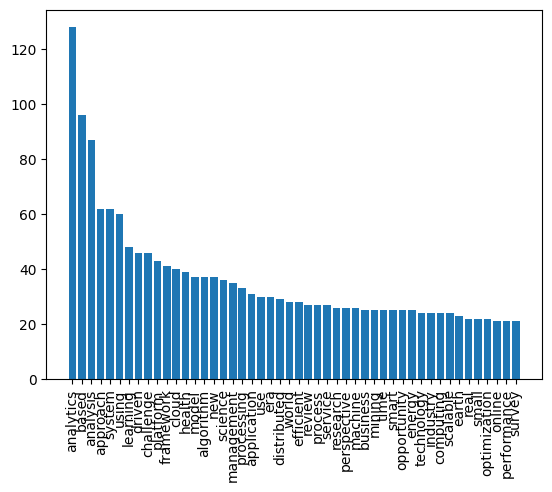

In [41]:
del word_count['big'] # 해당 단어에 대한 카운트 정보를 삭제
del word_count['data']
plt.bar(range(len(word_count)), word_count.values(), align='center')
plt.xticks(range(len(word_count)), word_count.keys(), rotation='vertical')
plt.show()

In [42]:
all_files_data_concat['doc_count']=0
summary_year = all_files_data_concat.groupby('출판일',as_index=False)['doc_count'].count()
print(summary_year)

     출판일  doc_count
0   2003          1
1   2004          2
2   2011          6
3   2012         21
4   2013         51
5   2014        128
6   2015        100
7   2016        130
8   2017        132
9   2018        131
10  2019         84
11  2020         98
12  2021         78
13  2022         37
14  2023          1


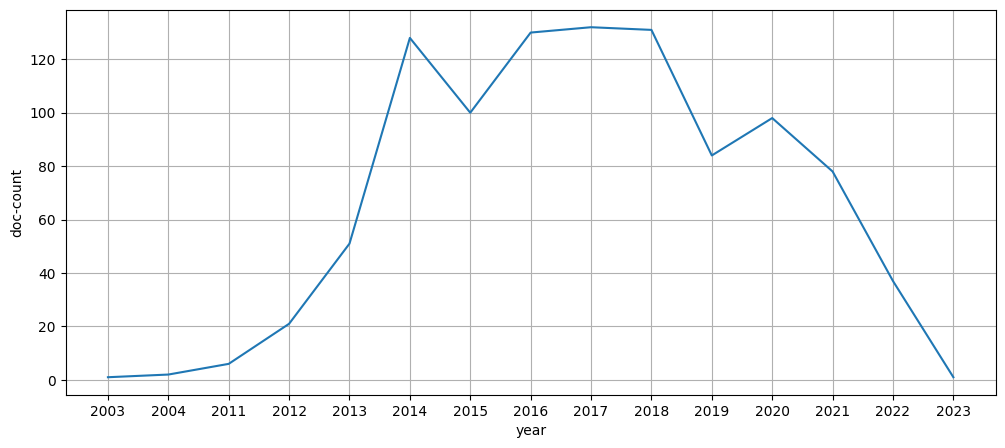

In [43]:
plt.figure(figsize=(12,5))
plt.xlabel('year')
plt.ylabel('doc-count')
plt.grid(True)
plt.plot(range(len(summary_year)),summary_year['doc_count'])
plt.xticks(range(len(summary_year)),summary_year['출판일'])
plt.show()

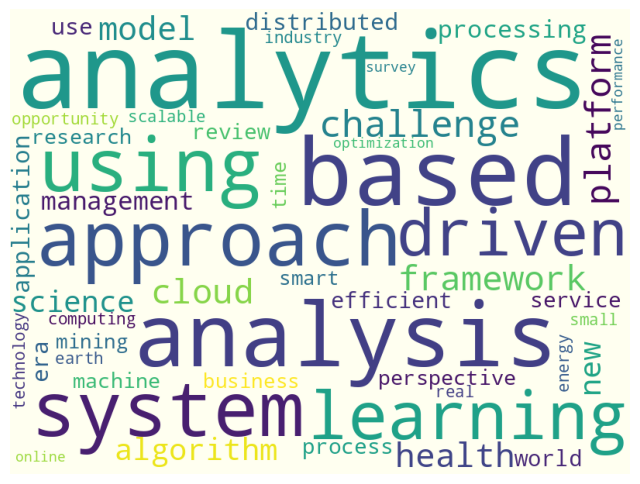

In [44]:
stopwords = set(STOPWORDS) #불용어
wc = WordCloud(background_color='ivory', stopwords = stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [45]:
cloud.to_file("riss_bigdata_wordCloud.jpg")